In [1]:
import pandas as pd

In [2]:
import numpy as np
#loading the data set
data = pd.read_csv('../troop_movements.csv')
print(data.head())



             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-05-21 14:48:21        1  resistance_soldier               empire   
1  2024-05-21 14:48:20        2  resistance_soldier               empire   
2  2024-05-21 14:48:19        3             unknown               empire   
3  2024-05-21 14:48:18        4             unknown           resistance   
4  2024-05-21 14:48:17        5              x-wing               empire   

   location_x  location_y  destination_x  destination_y     homeworld  
0           9           6              5              4        Mirial  
1          10           9              6              9  Concord Dawn  
2           3           6              4              6       Tholoth  
3           7           1              6              5       Stewjon  
4           2           2              5              2          Ojom  


In [3]:
df = pd.DataFrame(data = data)
print(df.head())


             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-05-21 14:48:21        1  resistance_soldier               empire   
1  2024-05-21 14:48:20        2  resistance_soldier               empire   
2  2024-05-21 14:48:19        3             unknown               empire   
3  2024-05-21 14:48:18        4             unknown           resistance   
4  2024-05-21 14:48:17        5              x-wing               empire   

   location_x  location_y  destination_x  destination_y     homeworld  
0           9           6              5              4        Mirial  
1          10           9              6              9  Concord Dawn  
2           3           6              4              6       Tholoth  
3           7           1              6              5       Stewjon  
4           2           2              5              2          Ojom  


In [4]:
# df.groupby(['homeworld', 'unit_id'], as_index = False).count()
# SELECT DISTINCT HOMEWORLD, COUNT 
# pd.Series(df as "Homeworld Count"['homeworld'].drop_duplicates().size)
series = pd.Series(df['homeworld'].drop_duplicates().size, name="Homeworld count")
series.columns = ['Homeworld', 'Homeworld_count']
print(series)

# series = pd.Series(data)
# series = pd.DataFrame(series, columns = ['Homeworld', 'Homeworld Population'])
# print(series)

0    42
Name: Homeworld count, dtype: int64


In [5]:
groupHomeworld = df.groupby(['homeworld']).size().reset_index(name = 'count')
groupHomeworld

,homeworld,count
0,Alderaan,35
1,Aleen Minor,20
2,Bestine IV,20
3,Cerea,18
4,Champala,13
5,Chandrila,23
6,Concord Dawn,21
7,Corellia,23
8,Dagobah,20
9,Dathomir,23


In [6]:
groupeR = df.groupby(['empire_or_resistance']).size().reset_index(name = 'count')
groupeR


,empire_or_resistance,count
0,empire,494
1,resistance,506


In [8]:
groupUnitType = df.groupby(['unit_type']).size().reset_index(name = 'count')
groupUnitType

,unit_type,count
0,at-at,117
1,at-st,124
2,resistance_soldier,118
3,stormtrooper,141
4,tie_fighter,125
5,tie_silencer,139
6,unknown,117
7,x-wing,119


In [9]:

boolData = []
for index, row in df.iterrows():
    if row['empire_or_resistance'] == "empire":
        boolData.append(False)
    else:
        boolData.append(True)

df['is__resistance'] = boolData


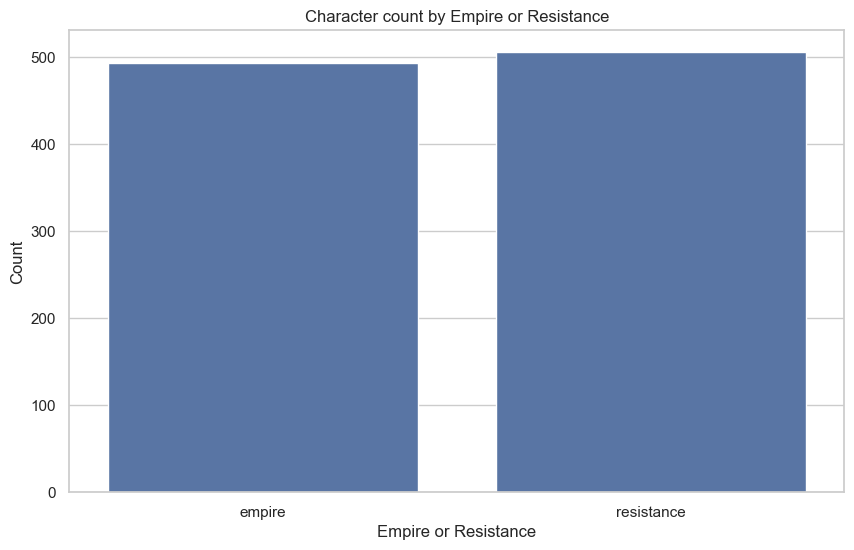

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 6))
sns.barplot(data = groupeR, x = groupeR.empire_or_resistance, y = groupeR['count'])
plt.title('Character count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')

plt.show()

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib


In [14]:
# get the data
from sklearn.datasets import load_wine
# get tools to split data
from sklearn.model_selection import train_test_split
# get the model we want to work with
from sklearn.tree import DecisionTreeClassifier
# get tools to check model performance
from sklearn.metrics import accuracy_score
# more on this later
from sklearn import tree
# stuff to plot this

In [15]:
print(data.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-05-21 14:48:21        1  resistance_soldier               empire   
1  2024-05-21 14:48:20        2  resistance_soldier               empire   
2  2024-05-21 14:48:19        3             unknown               empire   
3  2024-05-21 14:48:18        4             unknown           resistance   
4  2024-05-21 14:48:17        5              x-wing               empire   

   location_x  location_y  destination_x  destination_y     homeworld  
0           9           6              5              4        Mirial  
1          10           9              6              9  Concord Dawn  
2           3           6              4              6       Tholoth  
3           7           1              6              5       Stewjon  
4           2           2              5              2          Ojom  


In [17]:
EoR_df = pd.DataFrame(data=data, columns=[data.homeworld, data.unit_type])
print(EoR_df.head())


homeworld             Mirial       Concord Dawn Tholoth Stewjon   Ojom  \
unit_type resistance_soldier resistance_soldier unknown unknown x-wing   
0                        NaN                NaN     NaN     NaN    NaN   
1                        NaN                NaN     NaN     NaN    NaN   
2                        NaN                NaN     NaN     NaN    NaN   
3                        NaN                NaN     NaN     NaN    NaN   
4                        NaN                NaN     NaN     NaN    NaN   

homeworld Toydaria Champala       Naboo     Sullust    Ojom  ...  Shili  \
unit_type    at-at    at-st tie_fighter tie_fighter unknown  ... x-wing   
0              NaN      NaN         NaN         NaN     NaN  ...    NaN   
1              NaN      NaN         NaN         NaN     NaN  ...    NaN   
2              NaN      NaN         NaN         NaN     NaN  ...    NaN   
3              NaN      NaN         NaN         NaN     NaN  ...    NaN   
4              NaN      NaN    